In [129]:
from matplotlib import pyplot as plt

import torch
from torch.nn import functional as F

from model import NGram

## Load Data


In [2]:
words = open("../../data/names.txt", "r").read().splitlines()

chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

block_size = 3
X, Y = [], []

for w in words[:]:
    context = [0] * 3
    for c in w + ".":
        ix = stoi[c]
        X.append(context)
        Y.append(ix)
        # print([itos[c] for c in context], "-->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
len(X)

228146

In [41]:
def cross_entropy(logits, Y):
    logits = (
        logits - logits.max(1, keepdim=True).values
    )  # so exp doesn't overflow 2 inf
    counts = logits.exp()
    prob = counts / counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(len(logits)), Y].log().mean()
    return loss

## Best LR


no.of paramters: 3481
0.138401597738266


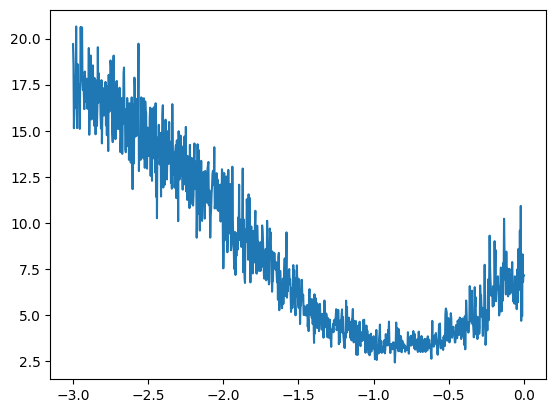

In [234]:
batch_size = 32
n_iters = 1_000
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
losses = []
m = NGram()

for i in range(n_iters):
    # mini-batch
    ix = torch.randint(0, len(X), (batch_size,))
    logits = m.forward(X[ix])

    loss = cross_entropy(logits, Y[ix])
    losses.append(loss.item())

    for p in m.parameters:
        p.grad = None

    loss.backward()

    for p in m.parameters:
        p.data += -lrs[i] * p.grad

print(lrs[torch.argmin(torch.tensor(losses))].item())
plt.plot(lre, losses)

## Train


In [308]:
batch_size = 32
n_iters = 10_000
lr = 0.1

m = NGram()
losses = []

no.of paramters: 3481


2.3730454444885254
2.4224185943603516
2.878037691116333
2.41815447807312
2.165327548980713
2.7488129138946533
2.9946718215942383
2.567223310470581
2.2852847576141357
2.357028007507324


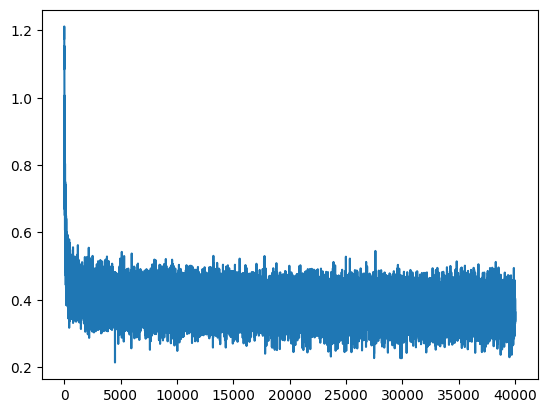

In [314]:
for i in range(n_iters):
    # mini-batch
    ix = torch.randint(0, len(X), (batch_size,))
    logits = m.forward(X[ix])

    loss = cross_entropy(logits, Y[ix])
    losses.append(loss.log10().item())  # mini-batch loss

    if i % 1_000 == 0:
        print(loss.item())

    for p in m.parameters:
        p.grad = None

    loss.backward()

    for p in m.parameters:
        p.data += -lr * p.grad

plt.plot(range(len(losses)), losses)

### Total loss


In [315]:
logits = m.forward(X)
loss = cross_entropy(logits, Y)
loss

tensor(2.3806, grad_fn=<NegBackward0>)

In [319]:
def predict(n=10):
    for i in range(n):
        out = []
        context = [0] * 3
        while True:
            logits = m.forward(context)
            probs = F.softmax(logits, 1)
            ix = torch.multinomial(probs, num_samples=1).item()
            context = context[1:] + [ix]
            out.append(itos[ix])
            if ix == 0:
                break
        print("".join(out))


predict()

syaniya.
arena.
ken.
bifxi.
kynssynslari.
than.
mily.
ame.
ajrian.
jyamansr.
